In [2]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
tf.config.experimental.list_physical_devices()
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dense ,Dropout, Flatten
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

In [3]:
total_images=0
dir=os.listdir("images_original/")
for d in dir:
    files=list(os.listdir("images_original/"+d))
    print(d+" Folder Has "+str(len(files))+" images")
    total_images=total_images+len(files)
print("Total Images : " ,total_images)

blues Folder Has 100 images
classical Folder Has 100 images
country Folder Has 100 images
disco Folder Has 100 images
hiphop Folder Has 100 images
jazz Folder Has 99 images
metal Folder Has 100 images
pop Folder Has 100 images
reggae Folder Has 100 images
rock Folder Has 100 images
Total Images :  999


In [4]:
base_dir="images_original/"
training_dataset=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                           image_size=(180,180),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='training',
                                                            batch_size=32)

Found 999 files belonging to 10 classes.
Using 800 files for training.


In [5]:
validation_dataset=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                           image_size=(180,180),
                                                           seed=123,
                                                           validation_split=0.2,
                                                           subset='validation',
                                                              batch_size=32)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [6]:
genre_names=training_dataset.class_names
genre_names

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

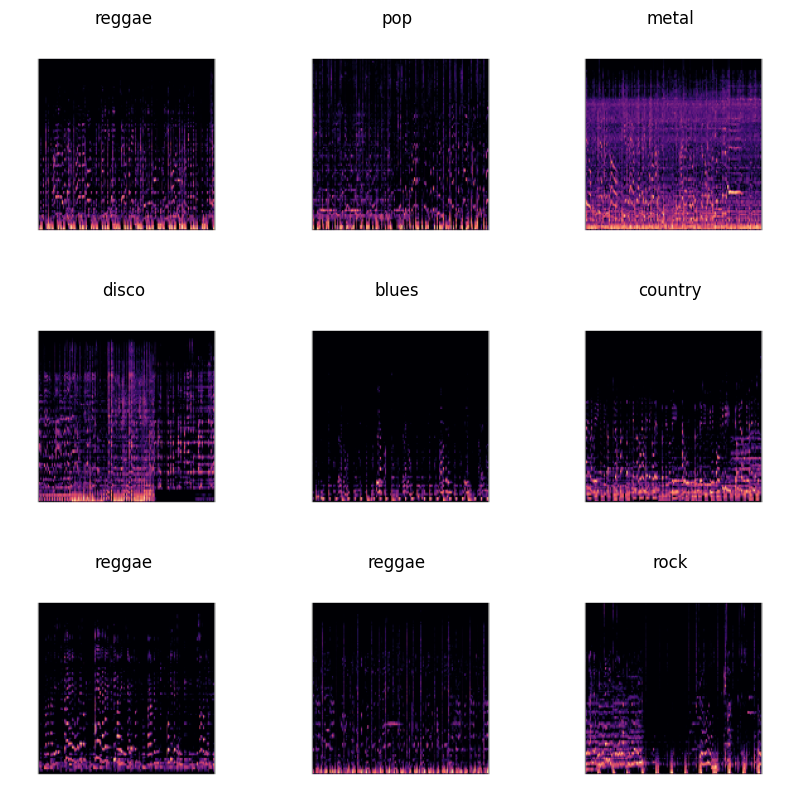

In [7]:
plt.figure(figsize=(10,10))
for images , labels in training_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(genre_names[labels[i]])
        plt.axis("off")

In [8]:
AUTOTUNE =tf.data.AUTOTUNE

In [9]:
training_dataset=training_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [10]:
validation_dataset=validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

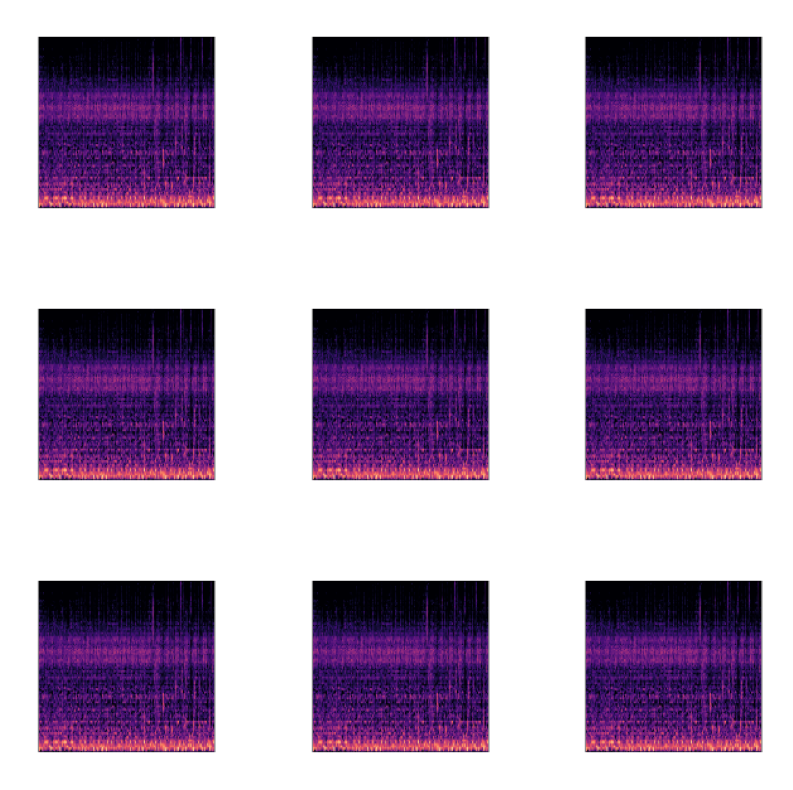

In [11]:
i=0
plt.figure(figsize=(10,10))

for images , labels in training_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis("off")

In [12]:
model=Sequential([
    layers.Rescaling(1./255),
    Conv2D(16,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(32,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPooling2D(),
    
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10)
    
])
model.build(input_shape=(None, 180, 180, 3))

In [13]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,930 (15.22 MB)

 Trainable params: 3,989,930 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history =model.fit(training_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 800ms/step - accuracy: 0.1172 - loss: 2.4566 - val_accuracy: 0.1859 - val_loss: 2.2078
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 807ms/step - accuracy: 0.2837 - loss: 1.9670 - val_accuracy: 0.3367 - val_loss: 1.9347
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 885ms/step - accuracy: 0.4222 - loss: 1.6503 - val_accuracy: 0.3970 - val_loss: 1.6369
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 821ms/step - accuracy: 0.5291 - loss: 1.3517 - val_accuracy: 0.4472 - val_loss: 1.4963
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 806ms/step - accuracy: 0.6135 - loss: 1.1243 - val_accuracy: 0.4975 - val_loss: 1.5333
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 777ms/step - accuracy: 0.6897 - loss: 0.9374 - val_accuracy: 0.5427 - val_loss: 1.2687
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 774ms/step - accuracy: 0.7198 - loss: 0.8348 - val_accuracy: 0.4925 - val_loss: 1.3930
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 776ms/step - accuracy: 0.7960 - loss: 0.6513 - val_accu

In [16]:
accuracy=model.evaluate(training_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.9982 - loss: 0.0128
compile_metrics: 99.624997%


In [30]:
accuracy=model.evaluate(validation_dataset)     
print("%s: The Accuracy on Testing Dataset in GTZAN is      :      %2f%%"%(model.metrics_names[1],accuracy[1]*120))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.5153 - loss: 2.0323
compile_metrics: The Accuracy on Testing Dataset in GTZAN is      :      63.919601%


In [31]:
# Save the trained model to a file (HDF5 format)
model.save('music_genre_model.h5')